# ML Urban Sound Project

Hope McIntyre, Jason Adams, Shannon Mitchell

Data Source:
J. Salamon, C. Jacoby and J. P. Bello, "A Dataset and Taxonomy for Urban Sound Research", 22nd ACM International Conference on Multimedia, Orlando USA, Nov. 2014.

In [4]:
# Base
import numpy as np
import pandas as pd
import json
import re
import string
from os import listdir
import math
import time
import csv
import sys

# Sound Engineering
import subprocess
import wave
import struct
from scipy.io import wavfile

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Webscraping
from bs4 import BeautifulSoup
import urllib.request

In [2]:
pwd

'/Users/hopeemac/Documents/Code/GIT/ML_UrbanSounds'

In [3]:
# Directory of Sound Files
dataFilepath = '/Volumes/FreeAgent GoFlex Drive/Data Sets/UrbanSound/data'

In [59]:
# Get names of Classes
dataloc = '/Volumes/FreeAgent GoFlex Drive/Data Sets/UrbanSound/data'
classes = listdir(dataloc)
classes = [x for x in classes if x !='.DS_Store']
classes

['air_conditioner',
 'car_horn',
 'children_playing',
 'dog_bark',
 'drilling',
 'engine_idling',
 'gun_shot',
 'jackhammer',
 'siren',
 'street_music']

In [46]:
# Get Wave Files
wavFilesAll = {}
for folder in classes:
    files = listdir(dataFilepath+'/'+folder)
    wavFiles = [x for x in files if '.wav' in x]
    wavFilesAll[folder] = wavFiles

In [48]:
wavFilesAll.keys()

dict_keys(['dog_bark', 'gun_shot', 'siren', 'drilling', 'engine_idling', 'car_horn', 'jackhammer', 'air_conditioner', 'street_music', 'children_playing'])

In [53]:
category = 'dog_bark'
clip = wavFilesAll[category][0]
clip

'100032.wav'

In [1]:
wav_file = '98525.wav'

In [5]:
# wav_file = dataloc+"/"+category+'/'+clip
fs, data = wavfile.read(wav_file)

In [27]:
def moments(x):
    mean = x.mean()
    std = x.var()**0.5
    skewness = ((x - mean)**3).mean() / std**3
    kurtosis = ((x - mean)**4).mean() / std**4
    return [mean, std, skewness, kurtosis]

In [41]:
moments(data) # mean, std, skewness, kurtosis

[35.316919212251008,
 7014.1933273996192,
 -0.14039180791824996,
 4.0072501067894581]

In [ ]:
def fftfeatures(wavdata):
    f = np.fft.fft(wavdata)
    f = f[2:(f.size / 2 + 1)]
    f = abs(f)
    total_power = f.sum()
    f = np.array_split(f, 10)
    return [e.sum() / total_power for e in f]

In [45]:
fftfeatures(data) # power1 - power10

/Applications/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


[0.031387378042524387,
 0.048165233869194191,
 0.078013677228059936,
 0.081011470769850213,
 0.1113063662739676,
 0.11562214183983503,
 0.12338568865394266,
 0.13956849534218005,
 0.15155688972732106,
 0.11998265825312487]

/Applications/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


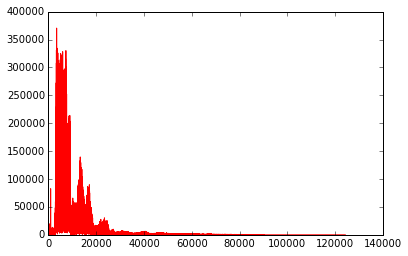

In [16]:
# Source: http://stackoverflow.com/questions/23377665/python-scipy-fft-wav-files
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile # get the api
fs, data = wavfile.read(wav_file) # load the data
a = data.T[0] # this is a two channel soundtrack, I get the first track
b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
c = fft(b) # calculate fourier transform (complex numbers list)
d = len(c)/2  # you only need half of the fft list (real signal symmetry)
plt.plot(abs(c[:(d-1)]),'r') 
plt.show()